# LINEAR PIZZA OVEN CHALLENGE

---

### Sources:
- S1: Camera that recognizes the topping [ws://streams:9400](ws://streams:9400)
- S2: Oven thermometer [ws://streams:9500](ws://streams:9500)

---

In [61]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL

### Publish the streams

In [99]:
###Create stream from both sensors
streamhub = RSPPublisher("http://streamhub:9292/streamhub")

In [100]:
##Publication query
vocals1 = '''
BASE  <http://streamhub:9292/streamhub>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dcat: <http://www.w3.org/ns/dcat#>
PREFIX frmt: <http://www.w3.org/ns/formats/>
PREFIX vocals: <http://w3id.org/rsp/vocals#>
PREFIX vsd: <http://w3id.org/rsp/vocals-sd#>
REGISTER STREAM :pizzastream
FROM SOURCE <ws://streams:9400>
WHERE {

           {this} a vocals:StreamDescriptor .

           {publisher} a vsd:PublishingService ;
                         vsd:hasFeature vsd:replaying ;
                         vsd:resultFormat frmt:JSON-LD .

           :PizzaEndpoint a vocals:StreamEndpoint ;
                            dcat:title "A Pizza Stream Endpoint"^^xsd:string ;
                            dcat:description "Streaming endpoint to consume Colors via WebSocket"^^xsd:string ;
                            dcat:license <https://creativecommons.org/licenses/by-nc/4.0/> ;
                            dcat:format frmt:JSON-LD ;
                            dcat:accessURL {source} ;
                            vsd:publishedBy {publisher} .

           {stream} a vocals:RDFStream ;
                    dcat:title "Color Stream"^^xsd:string ;
                    dcat:description "Stream of colors"^^xsd:string ;
                    dcat:publisher {publisher} ;
                    dcat:landingPage <https://example.org/rw/colors/> ;
                    vocals:hasEndpoint :PizzaEndpoint  .

}'''

In [101]:
streamhub.publish(vocals1)

{
    "@id": "streams/pizzastream",
    "@type": "vocals:StreamDescriptor",
    "dcat:dataset": {
        "@id": "streams/pizzastream",
        "@type": "vocals:RDFStream",
        "dcat:description": "Stream of colors",
        "dcat:landingPage": "https://example.org/rw/colors/",
        "dcat:publisher": "http://streamhub:9292/streamhub",
        "dcat:title": "Color Stream",
        "vocals:hasEndpoint": [
            [
                {
                    "@id": "http://streamhub:9292/streamhub/PizzaEndpoint",
                    "@type": "http://w3id.org/rsp/vocals#StreamEndpoint",
                    "dcat:title": "A Pizza Stream Endpoint",
                    "dcat:description": "Streaming endpoint to consume Colors via WebSocket",
                    "dcat:license": "https://creativecommons.org/licenses/by-nc/4.0/",
                    "dcat:format": "http://www.w3.org/ns/formats/JSON-LD",
                    "dcat:accessURL": "ws://streams:9400",
                    "vsd:pub

In [102]:
##Publication query
vocals2 = '''
BASE  <http://streamhub:9292/streamhub>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dcat: <http://www.w3.org/ns/dcat#>
PREFIX frmt: <http://www.w3.org/ns/formats/>
PREFIX vocals: <http://w3id.org/rsp/vocals#>
PREFIX vsd: <http://w3id.org/rsp/vocals-sd#>
REGISTER STREAM :tempstream
FROM SOURCE <ws://streams:9500>
WHERE {

           {this} a vocals:StreamDescriptor .

           {publisher} a vsd:PublishingService ;
                         vsd:hasFeature vsd:replaying ;
                         vsd:resultFormat frmt:JSON-LD .

           :TempEndpoint a vocals:StreamEndpoint ;
                            dcat:title "A Pizza Stream Endpoint"^^xsd:string ;
                            dcat:description "Streaming endpoint to consume Colors via WebSocket"^^xsd:string ;
                            dcat:license <https://creativecommons.org/licenses/by-nc/4.0/> ;
                            dcat:format frmt:JSON-LD ;
                            dcat:accessURL {source} ;
                            vsd:publishedBy {publisher} .

           {stream} a vocals:RDFStream ;
                    dcat:title "Color Stream"^^xsd:string ;
                    dcat:description "Stream of colors"^^xsd:string ;
                    dcat:publisher {publisher} ;
                    dcat:landingPage <https://example.org/rw/colors/> ;
                    vocals:hasEndpoint :TempEndpoint  .

}'''

In [103]:
streamhub.publish(vocals2)

{
    "@id": "streams/tempstream",
    "@type": "vocals:StreamDescriptor",
    "dcat:dataset": {
        "@id": "streams/tempstream",
        "@type": "vocals:RDFStream",
        "dcat:description": "Stream of colors",
        "dcat:landingPage": "https://example.org/rw/colors/",
        "dcat:publisher": "http://streamhub:9292/streamhub",
        "dcat:title": "Color Stream",
        "vocals:hasEndpoint": [
            [
                {
                    "@id": "http://streamhub:9292/streamhub/TempEndpoint",
                    "@type": "http://w3id.org/rsp/vocals#StreamEndpoint",
                    "dcat:title": "A Pizza Stream Endpoint",
                    "dcat:description": "Streaming endpoint to consume Colors via WebSocket",
                    "dcat:license": "https://creativecommons.org/licenses/by-nc/4.0/",
                    "dcat:format": "http://www.w3.org/ns/formats/JSON-LD",
                    "dcat:accessURL": "ws://streams:9500",
                    "vsd:publis

In [104]:
streamhub.lists()

[http://streamhub:9292/streamhub/streams/pizzastream,
 http://streamhub:9292/streamhub/streams/tempstream]

#### Use this to delete the streams before closing...

In [105]:
streamhub.delete('pizzastream')
streamhub.delete('tempstream')
streamhub.lists()

[]

### Initialize the RSPEngine

In [37]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [38]:
jasper.streams()

[]

In [19]:
jasper.tasks()

[]

## Define the query

### Get the knowledge graph with Ontop from Carl's database
- Connect to the ontop container via SSH
- Run   
`./ontop materialize --format rdfxml -m input/cooking-mapping.ttl -p input/cooking.properties -o input/cooking-knowledge-graph.rdf`  
to export the graph built from Carl's relational database to an rdf file (Available at [http://localhost:8080/files/cooking-knowledge-graph.rdf](http://localhost:8080/files/cooking-knowledge-graph.rdf))

#### Generated RDF file `cooking-knowledge-graph.rdf` below

In [8]:
graph_file = open('./cooking-knowledge-graph.rdf', 'r')
text = graph_file.read()
print(text)

<?xml version="1.0" encoding="UTF-8"?>
<rdf:RDF
	xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">

<rdf:Description rdf:about="http://www.co-ode.org/ontologies/pizza/pizza.owl#Margherita">
	<tempAvg xmlns="http://linkeddata.stream/ontologies/cooking#" rdf:datatype="http://www.w3.org/2001/XMLSchema#decimal">280</tempAvg>
</rdf:Description>

<rdf:Description rdf:about="http://www.co-ode.org/ontologies/pizza/pizza.owl#American">
	<tempAvg xmlns="http://linkeddata.stream/ontologies/cooking#" rdf:datatype="http://www.w3.org/2001/XMLSchema#decimal">270</tempAvg>
</rdf:Description>

<rdf:Description rdf:about="http://www.co-ode.org/ontologies/pizza/pizza.owl#Margherita">
	<tempStd xmlns="http://linkeddata.stream/ontologies/cooking#" rdf:datatype="http://www.w3.org/2001/XMLSchema#decimal">10</tempStd>
</rdf:Description>

<rdf:Description rdf:about="http://www.co-ode.org/ontologies/pizza/pizza.owl#American">
	<tempStd xmlns="http://linkeddata.stream/ontologies/cooking#" rdf:datatype="ht

### Check the Pizza Ontology
Check the [Pizza Ontology](https://protege.stanford.edu/ontologies/pizza/pizza.owl) to write the query

PREFIX is not supported, I have to use it statically...

#### List of useful PREFIXs I'll need:
- http://www.co-ode.org/ontologies/pizza/pizza.owl#

### Query parameters

In [108]:
qid = "cooking"
tbox = "https://protege.stanford.edu/ontologies/pizza/pizza.owl"
frmt = "JSON"
body = '''
SELECT ?x
FROM NAMED WINDOW <wwin> ON <http://streamhub:9292/streamhub/streams/pizzastream> [RANGE PT10S STEP PT10S]
    WHERE {
        WINDOW <wwin> { ?x a pzo:Pizza .}
    }
'''

In [109]:
jasper.create(qid, body, tbox, frmt)

http://jasper:8181/jasper/queries/cooking

In [78]:
cooking_q = jasper.getq(qid)
cooking_q

http://jasper:8181/jasper/queries/cooking

In [79]:
jasper.streams()

[http://jasper:8181/jasper/streams/cooking,
 http://streamhub:9292/streamhub/streams/pizzastream]

In [80]:
cooking_stream = cooking_q.stream()

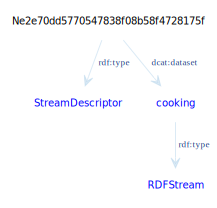

In [81]:
from rsplib.drawgraph import draw_graph
from IPython.display import display_html, Javascript, SVG, Image, display_svg,display_png

data, metadata = draw_graph(cooking_stream.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [82]:
r = jasper.expose(qid, 'HTTP', retention=5)

In [83]:
endpoint = r.endpoints()[0]
endpoint

GET http://jasper:8182/jasper/streams/cooking/observers/1694407690

In [84]:
jasper.delete(qid)

{
    "@id": "queries/cooking",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/cooking"
    },
    "prov:uses": {
        "@id": "http://streamhub:9292/streamhub/streams/pizzastream"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}